### Import Lines 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/948.2 kB 156.6 kB/s eta 0:00:03
     ------------------- ---------------- 524.3/948.2 kB 156.6 kB/s eta 0:00:03
     ------------------- ---------------- 524.3/948.2 kB 156.6 kB/s eta 0:00:03
     ---------

### Fetch Data 

In [13]:
import yfinance as yf 
def get_stock_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    
    return df 

df = get_stock_data('^NSEI', '2023-01-01', '2024-01-01', )
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2023-01-02,18197.449219,18197.449219,18215.150391,18086.500000,18131.699219,256100
2023-01-03,18232.550781,18232.550781,18251.949219,18149.800781,18163.199219,208700
2023-01-04,18042.949219,18042.949219,18243.000000,18020.599609,18230.650391,235200
2023-01-05,17992.150391,17992.150391,18120.300781,17892.599609,18101.949219,269900
2023-01-06,17859.449219,17859.449219,18047.400391,17795.550781,18008.050781,238200
...,...,...,...,...,...,...
2023-12-22,21349.400391,21349.400391,21390.500000,21232.449219,21295.849609,284700
2023-12-26,21441.349609,21441.349609,21477.150391,21329.449219,21365.199219,219500


### William Fractals 

In [15]:
def calculate_fractals(df):
    highs = df['High']
    lows = df['Low']
    
    # Identify potential fractals
    is_fractal_high = (highs.shift(1) < highs) & (highs.shift(-1) < highs)
    is_fractal_low = (lows.shift(1) > lows) & (lows.shift(-1) > lows)
    
    df['fractal_highs'] = np.where(is_fractal_high, highs, np.nan)
    df['fractal_lows'] = np.where(is_fractal_low, lows, np.nan)
    
    return df

# Calculate fractals 
df = calculate_fractals(df)
df

Price,Adj Close,Close,High,Low,Open,Volume,fractal_highs,fractal_lows
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,
Date,,,,,,,,
2023-01-02,18197.449219,18197.449219,18215.150391,18086.500000,18131.699219,256100,NaN,NaN
2023-01-03,18232.550781,18232.550781,18251.949219,18149.800781,18163.199219,208700,18251.949219,NaN
2023-01-04,18042.949219,18042.949219,18243.000000,18020.599609,18230.650391,235200,NaN,NaN
2023-01-05,17992.150391,17992.150391,18120.300781,17892.599609,18101.949219,269900,NaN,NaN
2023-01-06,17859.449219,17859.449219,18047.400391,17795.550781,18008.050781,238200,NaN,17795.550781
...,...,...,...,...,...,...,...,...
2023-12-22,21349.400391,21349.400391,21390.500000,21232.449219,21295.849609,284700,NaN,NaN
2023-12-26,21441.349609,21441.349609,21477.150391,21329.449219,21365.199219,219500,NaN,NaN


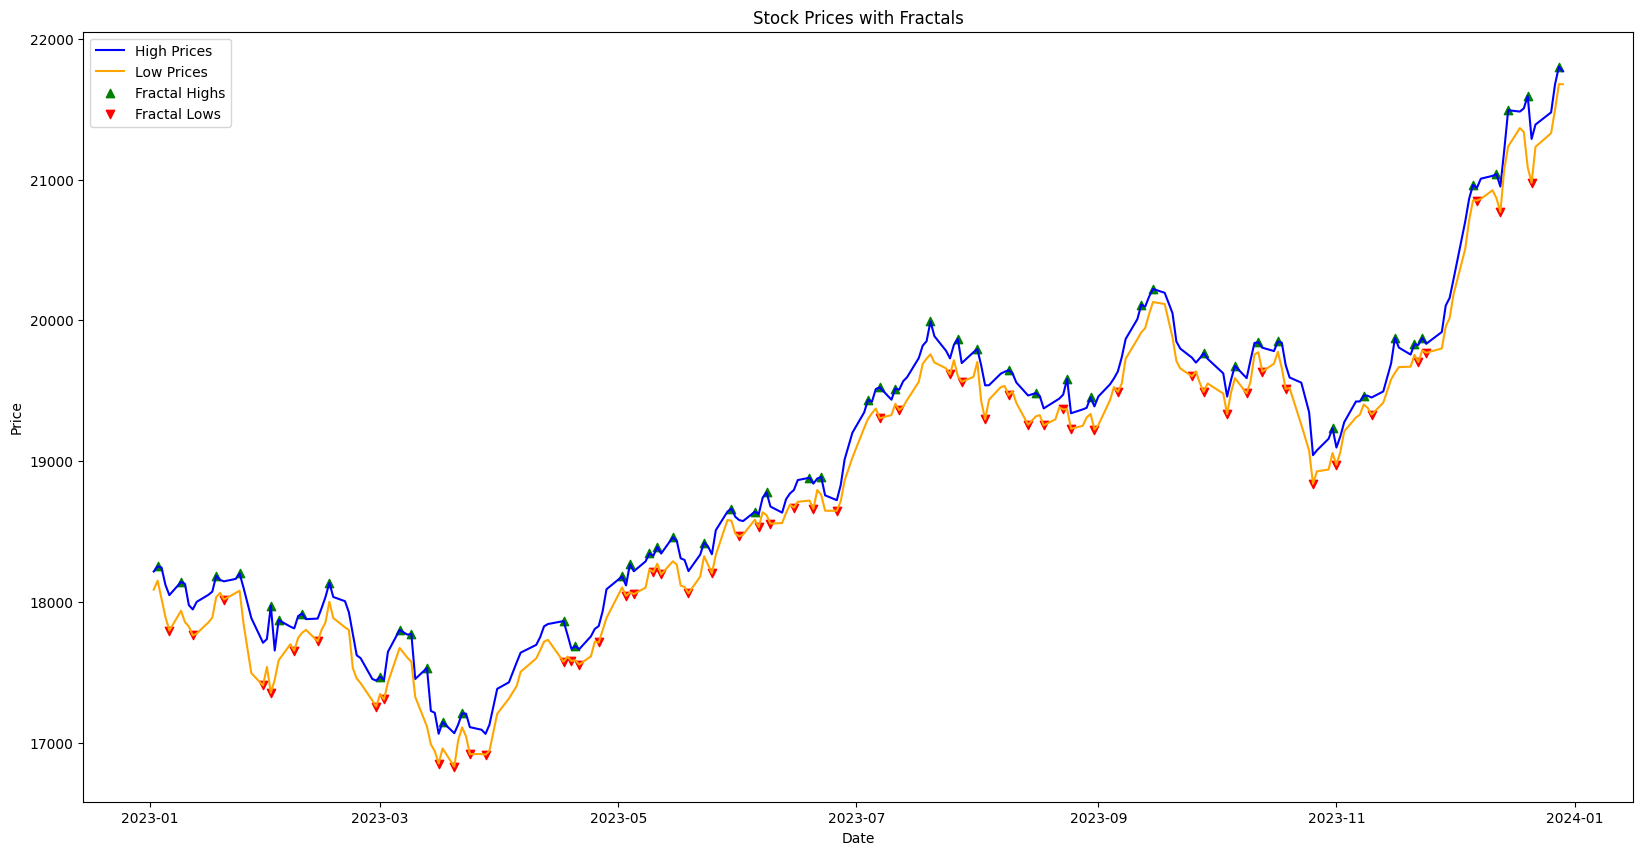

In [16]:
### Visualize the Fractals 

plt.figure(figsize=(20,10))
plt.plot(df['High'], label='High Prices', color='blue')
plt.plot(df['Low'], label='Low Prices', color='orange')
plt.scatter(df.index, df['fractal_highs'], marker='^', color='green', label='Fractal Highs')
plt.scatter(df.index, df['fractal_lows'], marker='v', color='red', label='Fractal Lows')
plt.title('Stock Prices with Fractals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Fibonacci Retracement

In [17]:
def fibonacci_retracement(df):

    max_fractal_price = df['fractal_highs'].tail(120).max()
    min_fractal_price = df['fractal_lows'].tail(120).min()
    
    #Calculate the difference between high and low price 
    price_range = max_fractal_price - min_fractal_price 
    
    #Calculate retracement levels 
    retracement_0 = max_fractal_price
    retracement_23_6 = max_fractal_price - 0.236 * price_range
    retracement_38_2 = max_fractal_price - 0.382 * price_range
    retracement_50 = max_fractal_price - 0.5 * price_range
    retracement_61_8 = max_fractal_price - 0.618 * price_range
    retracement_78_6 = max_fractal_price - 0.786 * price_range
    retracement_1 = min_fractal_price 
    
    #Create a dictionary to store retracement levels 
    retracement_levels = {
        '0%':retracement_0,
        '23.6%':retracement_23_6,
        '38.2%':retracement_38_2, 
        '50%': retracement_50, 
        '61.8%':retracement_61_8,
        '78.6%':retracement_78_6,
        '100%':retracement_1
    }
    
    return retracement_levels

retracement_levels = fibonacci_retracement(df)

#Display retracement levels
for level, price in retracement_levels.items():
    print(f'{level}:{price}')

0%:21801.44921875
23.6%:21102.0397109375
38.2%:20669.35416796875
50%:20319.6494140625
61.8%:19969.94466015625
78.6%:19472.05992578125
100%:18837.849609375


### Visualize the Fibonacci Retarcement

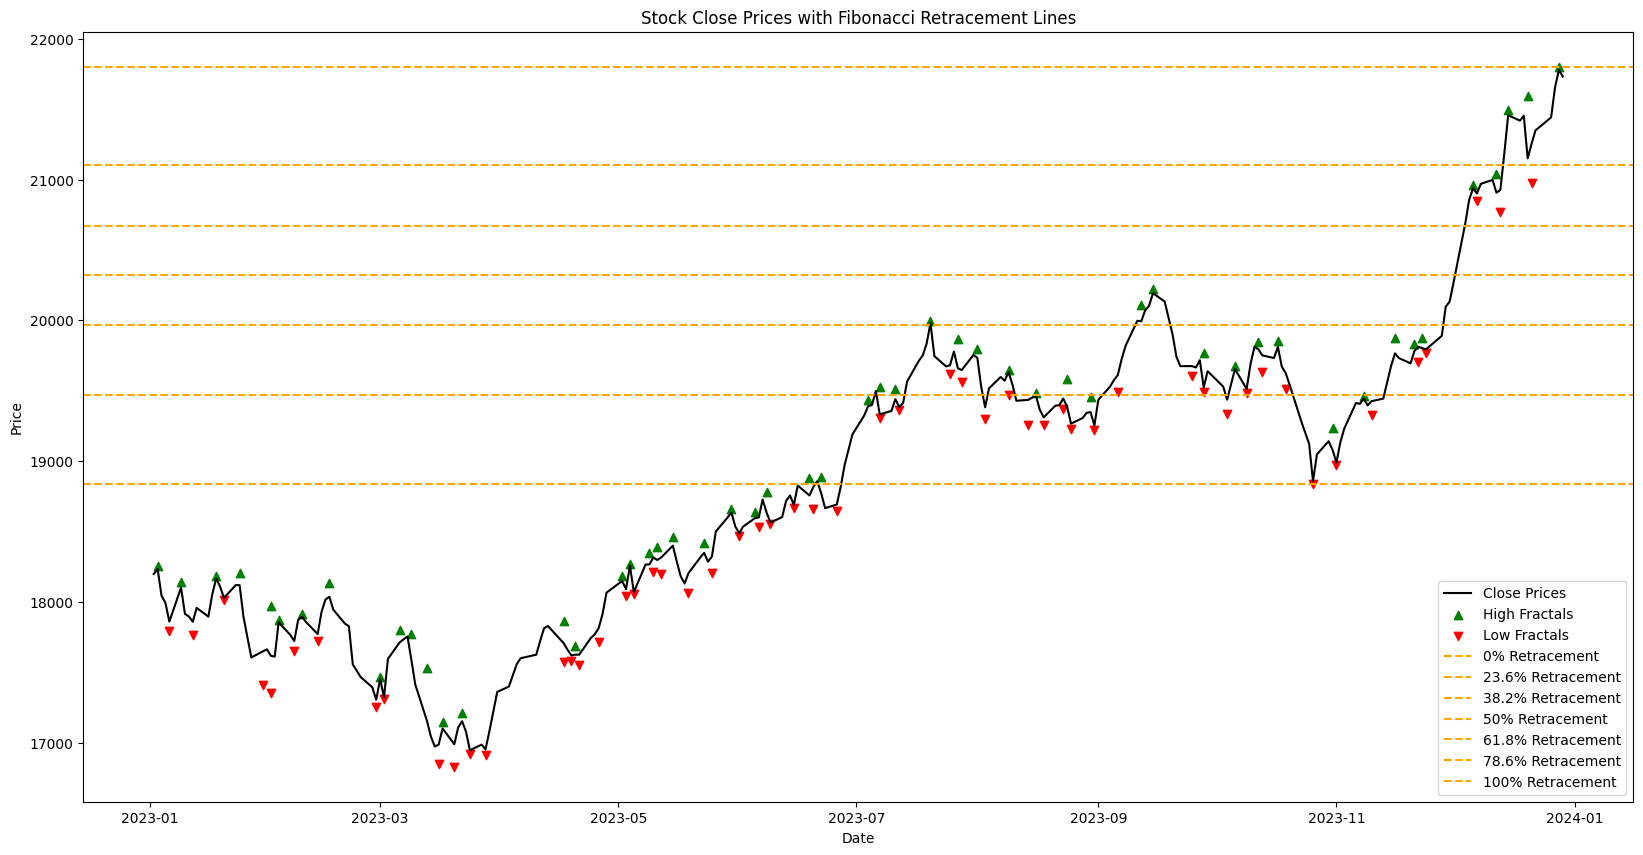

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'],label='Close Prices', color='black')
plt.scatter(df.index, df['fractal_highs'], marker='^', color='green',label='High Fractals')
plt.scatter(df.index, df['fractal_lows'], marker='v', color='red',label='Low Fractals')

for level, price in retracement_levels.items():
    plt.axhline(y=price, color="orange", linestyle='--', label=f'{level} Retracement')
    
plt.title('Stock Close Prices with Fibonacci Retracement Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()